### Pandas 복습

In [101]:
import pandas as pd
import numpy as np

In [102]:
x = [1,2,3,4,5]
pd.Series(x)

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [103]:
 #2차원 리스트로 데이터프레임 만들기
data = [['지원',10],['기범',20],['경수',30],['호영',40]] 
df = pd.DataFrameFrame(data,columns=['Name','Score'])
df

AttributeError: module 'pandas' has no attribute 'DataFrameFrame'

In [ ]:
#타이타닉 문제 질문사항에 대한 의견
#수진님 : titanic.groupby(["Sex","Survived"])["Survived"].count()
#호영님 : pd.DataFrame(titan_data.groupby('Sex').sum(),columns=['Survived'])


### Missingno

In [ ]:
bank_df = pd.read_csv('bank.csv')
bank_df

In [ ]:
bank_df.shape

In [ ]:
bank_df.dtypes

In [ ]:
bank_df.info()

In [ ]:
bank_df.isnull().sum()

In [ ]:
!pip install missingno

In [ ]:
import seaborn as sns   #결측치를 그래프로 볼 수 있음
sns.heatmap(bank_df.isnull(),cbar=False)

In [ ]:
import missingno as msno
msno.matrix(bank_df,figsize=(12,5),sparkline=False)
# 데이터가 많이 비어있구나. 채워야겠다

In [ ]:
msno.bar(bank_df,figsize=(12,5))
# 이것도 결측치 보는 법

In [104]:
print(bank_df.shape)
bank_df = bank_df.dropna(subset=['job','education'])  #dropna는 행을 지우는 것 (결측치 존재행?)
print(bank_df.shape)  #job, education에서 결측치가 있는애를 지운 것

(6935, 16)
(6935, 16)


In [105]:
bank_df.dropna(thresh = 2400, axis=1, inplace=True)   #inplace하면 데이터 삭제 위험.
print(bank_df.shape)
# 안전하게 하려면 inplace 안하는 것이 더 좋을 수 있음

(6935, 16)


In [106]:
bank_df['contact'].head()   #채워야 함

0    unknown
1    unknown
2    unknown
3    unknown
4    unknown
Name: contact, dtype: object

In [107]:
bank_df = bank_df.fillna({'contact':'unknown'})  #딕셔너리로도 가능
bank_df['contact'].head()

0    unknown
1    unknown
2    unknown
3    unknown
4    unknown
Name: contact, dtype: object

In [108]:
# 날짜 연습
time_index = pd.date_range('2020/01/01', periods=5,freq='MS')
time_index

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01'],
              dtype='datetime64[ns]', freq='MS')

In [109]:
df = pd.DataFrame(index=time_index)
df  #only 인덱스만 있음. 추가할 수 있다

""
2020-01-01
2020-02-01
2020-03-01
2020-04-01
2020-05-01


In [110]:
import numpy as np
df['Sales'] = [1.0,2.0,np.nan,np.nan,5.0]
df

,Sales
2020-01-01,1.0
2020-02-01,2.0
2020-03-01,NaN
2020-04-01,NaN
2020-05-01,5.0


In [111]:
df.interpolate()   #알아서 결측치 채워짐

,Sales
2020-01-01,1.0
2020-02-01,2.0
2020-03-01,3.0
2020-04-01,4.0
2020-05-01,5.0


In [112]:
df.ffill()

,Sales
2020-01-01,1.0
2020-02-01,2.0
2020-03-01,2.0
2020-04-01,2.0
2020-05-01,5.0


In [113]:
df.bfill()

,Sales
2020-01-01,1.0
2020-02-01,2.0
2020-03-01,5.0
2020-04-01,5.0
2020-05-01,5.0


In [114]:
df.fillna(method='ffill')

,Sales
2020-01-01,1.0
2020-02-01,2.0
2020-03-01,2.0
2020-04-01,2.0
2020-05-01,5.0


In [115]:
df.interpolate(limit=1, limit_direction='backward') #limit 2주면 다 채워짐

,Sales
2020-01-01,1.0
2020-02-01,2.0
2020-03-01,NaN
2020-04-01,4.0
2020-05-01,5.0


In [116]:
dict = {'One' :  [np.nan, np.nan, 95, 80], 
    'Two' : [np.nan, np.nan, np.nan, np.nan], 
    'Three':[52, np.nan, 80, 98], 
    'Four':[np.nan, np.nan, np.nan, 65],
    'Five':[10, None, 30, 40],
    'Six': [np.nan, np.nan, np.nan, pd.NaT],
    'Seven': [np.nan, np.nan, None, np.nan],
    'Eight': [np.nan, np.nan, None, pd.NaT]} 

df = pd.DataFrame(dict)
df

,One,Two,Three,Four,Five,Six,Seven,Eight
0,NaN,NaN,52.0,NaN,10.0,NaT,NaN,NaT
1,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT
2,95.0,NaN,80.0,NaN,30.0,NaT,NaN,NaT
3,80.0,NaN,98.0,65.0,40.0,NaT,NaN,NaT


In [117]:
df.dropna(how='all')

,One,Two,Three,Four,Five,Six,Seven,Eight
0,NaN,NaN,52.0,NaN,10.0,NaT,NaN,NaT
2,95.0,NaN,80.0,NaN,30.0,NaT,NaN,NaT
3,80.0,NaN,98.0,65.0,40.0,NaT,NaN,NaT


In [118]:
df.dropna(how='all',axis=1)

,One,Three,Four,Five
0,NaN,52.0,NaN,10.0
1,NaN,NaN,NaN,NaN
2,95.0,80.0,NaN,30.0
3,80.0,98.0,65.0,40.0


In [119]:
df.dropna()  #na가 있는 행 모두 삭제

,One,Two,Three,Four,Five,Six,Seven,Eight


In [120]:
df.dropna(subset=['One','Four'])

,One,Two,Three,Four,Five,Six,Seven,Eight
3,80.0,NaN,98.0,65.0,40.0,NaT,NaN,NaT


In [121]:
df.dropna(subset=['Eight'])

,One,Two,Three,Four,Five,Six,Seven,Eight


In [122]:
df.isnull()

,One,Two,Three,Four,Five,Six,Seven,Eight
0,True,True,False,True,False,True,True,True
1,True,True,True,True,True,True,True,True
2,False,True,False,True,False,True,True,True
3,False,True,False,False,False,True,True,True


In [123]:
df.isna().sum()

One      2
Two      4
Three    1
Four     3
Five     1
Six      4
Seven    4
Eight    4
dtype: int64

In [124]:
df.isna().sum().sum()

23

In [125]:
dict = {'First Score':[100, 90, None, 95, 85], 
        'Second Score': [30, 45, None, np.nan, 60], 
        'Third Score':[np.nan, 40, np.nan, 80, None]}

df = pd.DataFrame(dict)
df

,First Score,Second Score,Third Score
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,NaN,NaN,NaN
3,95.0,NaN,80.0
4,85.0,60.0,NaN


In [126]:
df.fillna(0)

,First Score,Second Score,Third Score
0,100.0,30.0,0.0
1,90.0,45.0,40.0
2,0.0,0.0,0.0
3,95.0,0.0,80.0
4,85.0,60.0,0.0


In [127]:
df.replace(to_replace=100.0,value=120.0)

,First Score,Second Score,Third Score
0,120.0,30.0,NaN
1,90.0,45.0,40.0
2,NaN,NaN,NaN
3,95.0,NaN,80.0
4,85.0,60.0,NaN


In [128]:
df.replace(to_replace=np.nan,value=-50)

,First Score,Second Score,Third Score
0,100.0,30.0,-50.0
1,90.0,45.0,40.0
2,-50.0,-50.0,-50.0
3,95.0,-50.0,80.0
4,85.0,60.0,-50.0


In [129]:
df.interpolate(limit_direction='both')  #interpolate는 복원

,First Score,Second Score,Third Score
0,100.0,30.0,40.0
1,90.0,45.0,40.0
2,92.5,50.0,60.0
3,95.0,55.0,80.0
4,85.0,60.0,80.0


In [130]:
df

,First Score,Second Score,Third Score
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,NaN,NaN,NaN
3,95.0,NaN,80.0
4,85.0,60.0,NaN


In [131]:
df = pd.DataFrame({'c1':['a', 'a', 'b', 'a', 'b'],
                  'c2':[1, 1, 1, 2, 2],
                  'c3':[1, 1, 2, 2, 2]})

df

,c1,c2,c3
0,a,1,1
1,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [132]:
df.duplicated()   #행을 앞에 행과 비교해 True or False 반환

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [133]:
df['c2'].duplicated()

0    False
1     True
2     True
3    False
4     True
Name: c2, dtype: bool

In [134]:
# duplicated 된것 삭제, 1행 사라짐..
df.drop_duplicates()

,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [135]:
df.drop_duplicates(subset=['c2','c3'])

,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2


In [136]:
df = pd.read_csv('stock-data.csv')
df

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039
5,2018-06-25,11150,11400,11450,11000,55519
6,2018-06-22,11300,11250,11450,10750,134805
7,2018-06-21,11200,11350,11750,11200,133002
8,2018-06-20,11550,11200,11600,10900,308596
9,2018-06-19,11300,11850,11950,11300,180656


In [137]:
df.info()   #object는 string. 날짜로 바꿔야 함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [138]:
df['new_Date'] = pd.to_datetime(df['Date'])
df   #실제 날짜 형식으로 바꿔줌

,Date,Close,Start,High,Low,Volume,new_Date
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26
5,2018-06-25,11150,11400,11450,11000,55519,2018-06-25
6,2018-06-22,11300,11250,11450,10750,134805,2018-06-22
7,2018-06-21,11200,11350,11750,11200,133002,2018-06-21
8,2018-06-20,11550,11200,11600,10900,308596,2018-06-20
9,2018-06-19,11300,11850,11950,11300,180656,2018-06-19


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   new_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB


In [140]:
df['new_Date'].dt.day

0      2
1     29
2     28
3     27
4     26
5     25
6     22
7     21
8     20
9     19
10    18
11    15
12    14
13    12
14    11
15     8
16     7
17     5
18     4
19     1
Name: new_Date, dtype: int64

In [141]:
d = "2018-06-01"
d[8:10]   #01을 가져오기 복잡합. 그래서 날짜 형식으로 바꾸는 것

'01'

In [142]:
df['Year'] = df['new_Date'].dt.year
df['Month'] = df['new_Date'].dt.month
df['Day'] = df['new_Date'].dt.day
df

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,Day
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7,2
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6,29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6,28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018,6,26
5,2018-06-25,11150,11400,11450,11000,55519,2018-06-25,2018,6,25
6,2018-06-22,11300,11250,11450,10750,134805,2018-06-22,2018,6,22
7,2018-06-21,11200,11350,11750,11200,133002,2018-06-21,2018,6,21
8,2018-06-20,11550,11200,11600,10900,308596,2018-06-20,2018,6,20
9,2018-06-19,11300,11850,11950,11300,180656,2018-06-19,2018,6,19


In [143]:
bank_df[bank_df['age']<8]  #이상치. 뭔가 데이터가 잘못됐을 것. 삭제할 수 있음
# 결측치, 이상치 처리해야. 보통 box plot 활용해서 처리함

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
519,2,blue-collar,single,secondary,no,874,yes,no,unknown,15,may,68,5,-1,0,no


### Matplotlib

In [144]:
import matplotlib.pyplot as plt
import numpy as np

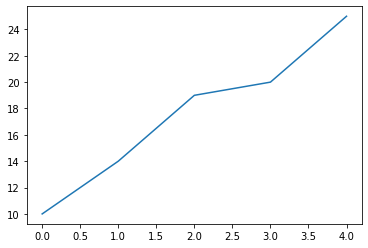

In [145]:
x = [10,14,19,20,25]
plt.plot(x)
plt.show()

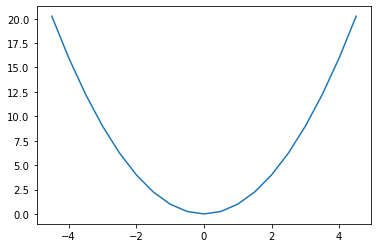

In [146]:
x = np.arange(-4.5,5,0.5)
y = x**2
plt.plot(x,y)
plt.show()

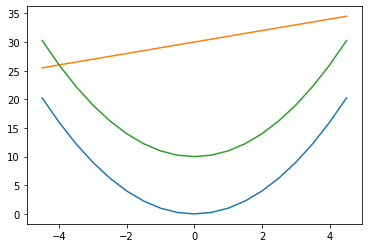

In [165]:
x = np.arange(-4.5,5,0.5)

y1 = x**2
y2 = x + 30
y3 = x**2 + 10

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.show()

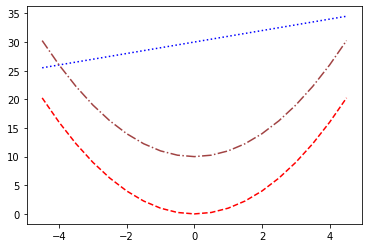

In [169]:
color = '#a14343'
plt.plot(x,y1, color = 'red', linestyle='dashed')
plt.plot(x,y2, 'b:')
plt.plot(x,y3, color=color, linestyle='-.')

plt.show()

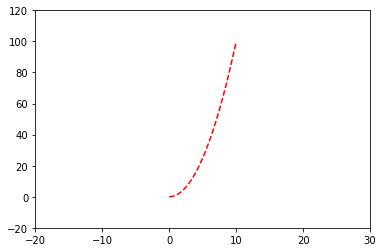

In [173]:
x = np.linspace(0,10,100)  #0부터 10까지 100개의 점
y=x**2

plt.plot(x,y,'--r')
#plt.xlim(-20,30)
#plt.ylim(-20,120)
plt.axis([-20,30,-20,120])  # 기존 데이터에서 강조할 때
plt.show()

In [174]:
plt.rc('font',family='AppleGothic')  # 라벨, 레전드 안깨지기 위해 폰트 변경

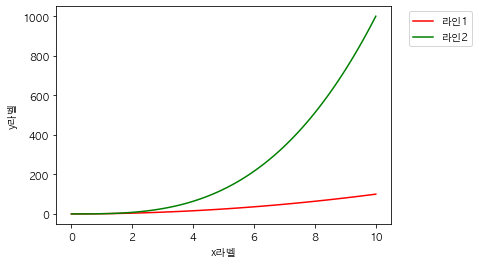

In [181]:
x = np.linspace(0,10,100)
y1 = x**2
y2 = x**3
# 선 라벨
plt.plot(x,y1,'r',label='라인1')
plt.plot(x,y2,'g',label='라인2')
# x축, y축 라벨
plt.xlabel('x라벨')
plt.ylabel('y라벨')

#plt.legend(loc=2) 그래프 내
plt.legend(bbox_to_anchor=(1.04,1))  #그래프 밖
plt.show()

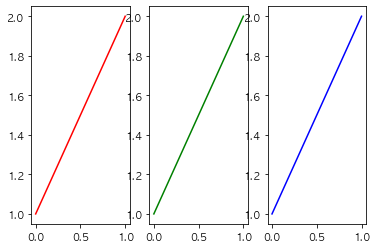

In [183]:
plt.subplot(131)
plt.plot([1,2],color='r')   #x값,y값

plt.subplot(132)
plt.plot([1,2],color='g')

plt.subplot(133)
plt.plot([1,2],color='b')

plt.show()

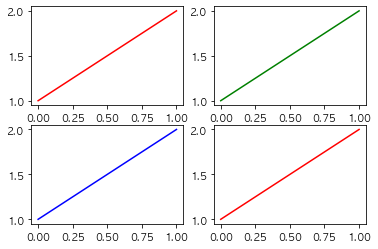

In [186]:
plt.subplot(221)
plt.plot([1,2],color='r')

plt.subplot(222)
plt.plot([1,2],color='g')

plt.subplot(223)
plt.plot([1,2],color='b')

plt.subplot(224)
plt.plot([1,2],color='r')

plt.show()

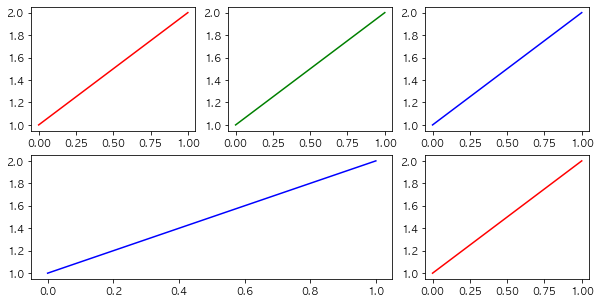

In [193]:
plt.figure(figsize=(10,5)) #그래프 전체 크기!!!!!!!!
grid = plt.GridSpec(2,3)  # GridSpec(행, 열)

plt.subplot(grid[0,0])  # 그리드 어느 곳에 넣을 것인가를 결정
plt.plot([1,2],color='r') # 어떤 그래프로 나타낼 것인가

plt.subplot(grid[0,1])
plt.plot([1,2],color='g')

plt.subplot(grid[0,2])
plt.plot([1,2],color='b')

plt.subplot(grid[1,0:2])
plt.plot([1,2],color='b')

plt.subplot(grid[1,2])
plt.plot([1,2],color='r')

plt.show()

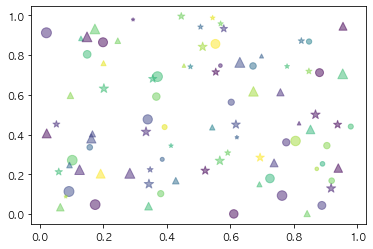

In [199]:
x = np.random.rand(30)
y = np.random.rand(30)
a = np.random.rand(30)
b = np.random.rand(30)
e = np.random.rand(30)
f = np.random.rand(30)
color = np.random.rand(30)

size = 100*np.random.rand(30)  # size 랜덤해서 다름

plt.scatter(x,y,s=size,c=color,alpha=0.5,marker='o')
plt.scatter(a,b,s=size,c=color,alpha=0.5,marker='^')
plt.scatter(e,f,s=size,c=color,alpha=0.5,marker='*')
plt.show()

In [227]:
data = [np.random.randint(1,7) for i in range(10)]
data

[3, 4, 1, 5, 6, 4, 4, 5, 6, 1]

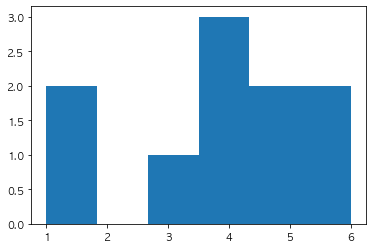

In [228]:
plt.hist(data,bins=6,alpha=1)
plt.show()

<BarContainer object of 5 artists>

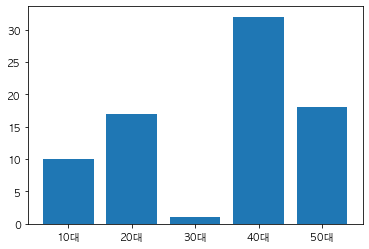

In [220]:
plt.bar(['10대','20대','30대','40대','50대'],[np.random.randint(1,50) for i in range(5)])

<BarContainer object of 5 artists>

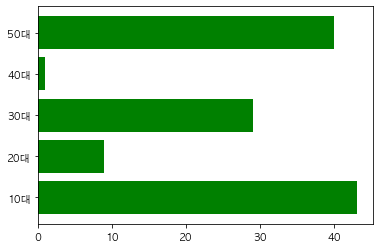

In [222]:
plt.barh(['10대','20대','30대','40대','50대'],[np.random.randint(1,50) for i in range(5)],color='g')



AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

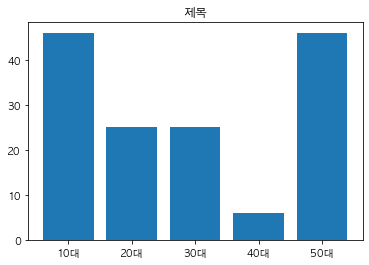